In [162]:
# import necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

from PIL import Image
import cv2

In [163]:
df = pd.read_json("photos.json", lines=True)

In [164]:
print(f"The dimensions of photos.json are {df.shape[0]} lines and {df.shape[1]} rows.")
df.head(5)

The dimensions of photos.json are 200100 lines and 4 rows.


,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [165]:
labels = df.label.unique().tolist()
labels

['inside', 'outside', 'drink', 'food', 'menu']

In [166]:
sample_df = pd.DataFrame()

for label in labels:
    label_df = df[df["label"] == label].sample(200, random_state=42)
    sample_df = sample_df.append(label_df, ignore_index=True)

C:\Users\Katrin\AppData\Local\Temp\ipykernel_19232\3964460357.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(label_df, ignore_index=True)


In [167]:
sample_df

,photo_id,business_id,caption,label
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside
...,...,...,...,...
995,FYcHZXujQX0GGs1oevYfdQ,jyRQNFeaGhdZBgf4kkWFlA,,menu
996,PP2dCAxKLHMzqNAQfoeerw,AvMhoV5RbPzm1TFuW8WEDQ,Yummy Noodles,menu
997,WiRnjbxlRNGBrCzYDhybWA,3VZsvccKrkvmBshoAFrgGw,Menu,menu
998,Wc-r1NIkj8VvpajjOFa1YA,g2hkkxwC2llfR-eYr0HPvQ,,menu


In [168]:
import os

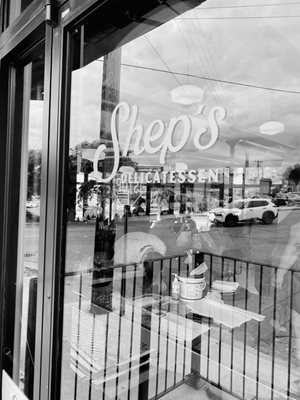

In [169]:
directory = "C:/Users/Katrin/Downloads/yelp_photos/photos/"
from PIL import ImageOps
img = Image.open(directory + sample_df.photo_id.iloc[300] + ".jpg")
img = ImageOps.grayscale(img)
img

In [170]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : L
Valeur du pixel situé en (20,100) : 21


In [171]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
mat

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

Taille de la matrice de pixels : (400, 300)


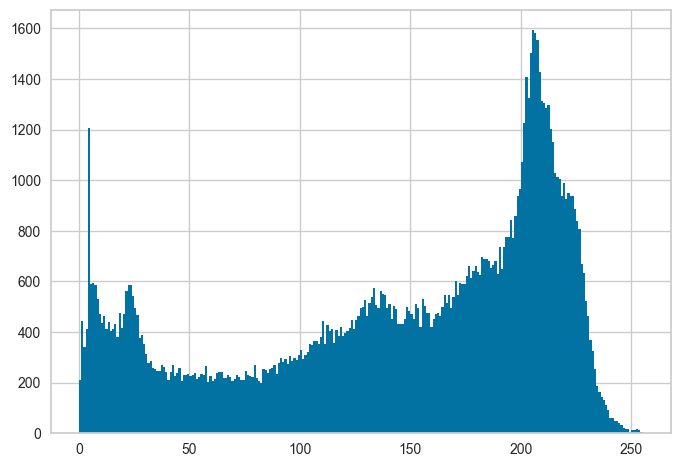

In [172]:
import matplotlib.pyplot as plt
# Charger l'image comme matrice de pixels
img_np = np.array(img)
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img_np.flatten(), bins=range(256))
plt.show()

In [173]:
img = ImageOps.autocontrast(img)
img = ImageOps.equalize(img)

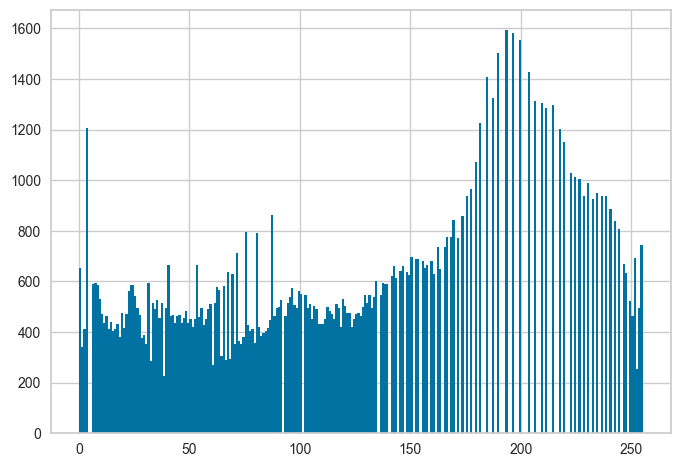

In [174]:
# Charger l'image comme matrice de pixels
img_np = np.array(img)
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img_np.flatten(), bins=range(256))
plt.show()

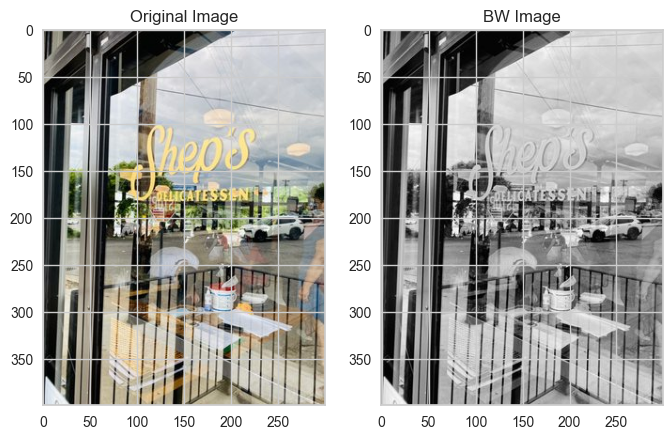

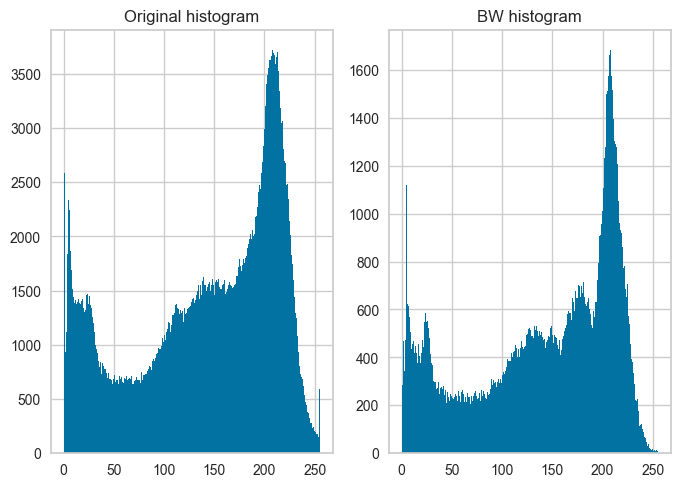

In [175]:
image_color = cv2.cvtColor(cv2.imread(directory + sample_df.photo_id.iloc[300] + ".jpg"), cv2.COLOR_BGR2RGB)
image_bw = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

images = []
images.append(image_color)
images.append(image_bw)

titles= ['Original Image', 'BW Image']

for i in range(len(images)):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    # plt.xticks([]),plt.yticks([])

plt.show()

image_color_np = np.array(image_color)
image_bw_np = np.array(image_bw)
images_np = []
images_np.append(image_color_np)
images_np.append(image_bw_np)

titles_hist = ['Original histogram', 'BW histogram']

for i in range(len(images_np)):
    plt.subplot(1,2,i+1),plt.hist(images_np[i].flatten(), bins=range(256))
    plt.title(titles_hist[i])
plt.show()

In [176]:
# image = cv2.equalizeHist(image)

# img_np = np.array(image)
# n, bins, patches = plt.hist(img_np.flatten(), bins=range(256))
# plt.show()

In [177]:
# image = cv2.blur(image, (3,3))

# img_np = np.array(image)
# n, bins, patches = plt.hist(img_np.flatten(), bins=range(256))
# plt.show()

NameError: name 'image' is not defined

"ORB performs as well as SIFT on the task of feature detection (and is better than SURF) while being almost two orders of magnitude faster."

In [ ]:
orb = cv2.ORB_create(nfeatures=500)
keypoints = orb.detect(image,None)
keypoints, descriptors = orb.compute(image, keypoints)

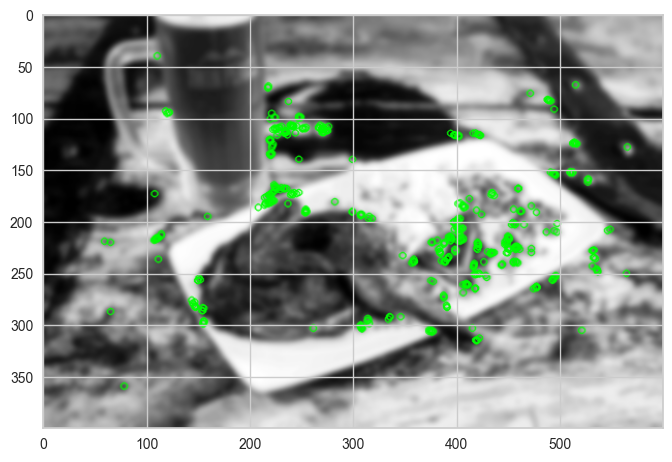

(<matplotlib.image.AxesImage at 0x20614244670>, None)

In [ ]:
image2 = cv2.drawKeypoints(image, keypoints, None, color=(0,255,0), flags=0)
plt.imshow(image2), plt.show()

In [ ]:
descriptors

array([[187, 223,  98, ..., 159, 249, 221],
       [155,  92, 110, ..., 189, 125, 253],
       [  3, 191, 194, ...,  68, 175, 221],
       ...,
       [206, 248, 191, ...,  81, 167, 250],
       [ 17,  92, 155, ...,  17,  66,  58],
       [  6, 179, 189, ...,   8, 165, 247]], dtype=uint8)

### Create an array of images in numpy array format

In [ ]:
sample_df.shape[0]

1000

In [415]:
sample_images = []

for i in range(0,1000):
    img = cv2.imread(directory + sample_df.photo_id.iloc[i] + ".jpg",0)
    # img = np.array(img)
    # img = cv2.resize(img,(224,224))
    img = cv2.equalizeHist(img)
    # img = cv2.blur(img, (3,3))
    # img = cv2.GaussianBlur(img, (3,3),0)
    sample_images.append(img)

In [416]:
sample_df["np_image"] = sample_images
sample_df = sample_df[["photo_id", "label", "np_image"]]
sample_df.head()

,photo_id,label,np_image
0,cO58-hmFkBxDUQ4B0p40AA,inside,"[[115, 115, 114, 112, 109, 108, 106, 104, 103,..."
1,7_hiXIbS5Ub0_eiRxr5COg,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,XseBUNM81RxxtfDgyjxXiA,inside,"[[210, 253, 247, 104, 92, 210, 232, 248, 162, ..."
3,_IRUZoGYSr9bICvBJrPnhw,inside,"[[149, 153, 159, 163, 161, 153, 142, 128, 106,..."
4,x8xVVzTI3yW5xZraRZNxfQ,inside,"[[162, 162, 156, 145, 138, 130, 113, 89, 86, 7..."


### Get descriptors for each image in sample_images

In [448]:
descriptors = []
keypoints = []

orb = cv2.ORB_create(nfeatures=50)

for img in sample_images:
    kp = orb.detect(img,None)
    kp, des = orb.compute(img, kp)
    descriptors.append(des)
    keypoints.append(kp)

In [449]:
# for i in range (sample_df.shape[0]):
#     sample_df["descriptors"][i] = sample_df["descriptors"][i].flatten()

In [450]:
# sample_df["descriptors"] = sample_df["descriptors"].apply(lambda x : np.concatenate(x))

In [459]:
desc = []
for i in range (sample_df.shape[0]):
    desc.append(np.concatenate(descriptors[i])[:1000])

In [460]:
np.unique(list(map(len, desc)))

array([1000])

In [461]:
sample_df["keypoints"] = keypoints
sample_df["descriptors"] = desc

In [462]:
# desc = np.concatenate(descriptors, axis=0)
# print()
# print("Shape of all_descriptors : ", all_descriptors.shape)

In [463]:
from sklearn import cluster

PCA

In [464]:
from sklearn.decomposition import PCA

In [465]:
len(desc[1])

1000

In [466]:
pca = PCA(n_components=0.90, random_state=42)
feat_pca = pca.fit_transform(desc)
print("Dimension after PCA reduction : ", feat_pca.shape)

Dimension after PCA reduction :  (1000, 435)


In [467]:
from sklearn.cluster import KMeans

In [468]:
kmeans = KMeans(n_clusters = 5)

In [469]:
label = kmeans.fit_predict(feat_pca)

In [470]:
sample_df["kmeans_label"] = label

In [471]:
sample_df.head(5)

,photo_id,label,np_image,keypoints,descriptors,kmeans_label
0,cO58-hmFkBxDUQ4B0p40AA,inside,"[[115, 115, 114, 112, 109, 108, 106, 104, 103,...","(< cv2.KeyPoint 000001DC66E2B060>, < cv2.KeyPo...","[1, 249, 27, 115, 32, 143, 97, 148, 126, 137, ...",2
1,7_hiXIbS5Ub0_eiRxr5COg,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(< cv2.KeyPoint 000001DC66E2B420>, < cv2.KeyPo...","[5, 176, 157, 209, 236, 253, 176, 154, 94, 249...",0
2,XseBUNM81RxxtfDgyjxXiA,inside,"[[210, 253, 247, 104, 92, 210, 232, 248, 162, ...","(< cv2.KeyPoint 000001DC66E38240>, < cv2.KeyPo...","[89, 25, 18, 118, 83, 252, 118, 81, 169, 64, 1...",3
3,_IRUZoGYSr9bICvBJrPnhw,inside,"[[149, 153, 159, 163, 161, 153, 142, 128, 106,...","(< cv2.KeyPoint 000001DC66E38BA0>, < cv2.KeyPo...","[205, 254, 141, 63, 248, 236, 39, 255, 190, 21...",1
4,x8xVVzTI3yW5xZraRZNxfQ,inside,"[[162, 162, 156, 145, 138, 130, 113, 89, 86, 7...","(< cv2.KeyPoint 000001DC66E39500>, < cv2.KeyPo...","[170, 89, 228, 87, 205, 81, 148, 103, 207, 246...",2


In [472]:
print(label)

[2 0 3 1 2 3 0 2 3 4 3 3 1 4 0 2 4 2 2 2 2 3 1 3 3 3 2 3 4 2 4 1 4 1 1 3 2
 3 3 1 1 2 3 2 1 3 1 2 2 2 2 3 0 1 2 3 0 4 2 0 3 3 1 1 3 2 4 2 1 3 1 1 1 3
 1 4 0 1 1 2 2 0 2 2 4 1 1 4 0 4 4 2 1 3 1 4 0 2 1 1 1 1 2 4 1 0 2 0 3 1 4
 3 4 0 1 3 1 2 0 0 0 1 1 3 0 4 1 3 4 2 3 3 1 1 3 1 3 3 3 1 2 3 2 0 4 4 1 4
 1 3 2 0 2 3 3 3 2 0 2 4 1 4 1 3 3 2 1 3 4 2 1 4 4 3 2 2 3 0 1 4 4 3 1 0 4
 2 3 2 0 1 2 1 0 4 0 1 3 2 3 2 1 2 0 2 4 1 2 1 3 2 4 1 4 2 1 4 4 4 1 2 2 0
 2 3 0 1 4 2 2 0 1 3 2 2 3 3 2 1 2 3 1 2 1 1 1 2 2 4 2 2 3 2 3 2 3 1 0 2 2
 4 3 4 2 4 0 1 4 4 2 2 4 4 1 3 4 4 2 3 2 2 3 0 2 3 3 0 2 2 0 4 3 3 1 0 1 0
 3 2 4 1 2 3 1 1 0 0 3 2 1 4 0 1 0 0 4 1 0 1 3 2 1 1 2 3 2 3 1 2 2 2 1 3 2
 3 3 2 3 1 2 2 2 3 4 1 2 1 1 4 2 4 2 2 3 3 2 1 3 2 1 3 2 1 3 3 2 0 1 1 0 0
 0 0 0 1 0 0 1 3 3 2 4 1 2 4 2 3 1 1 1 0 3 1 0 3 1 4 2 1 2 1 2 1 3 3 1 2 3
 3 4 3 3 2 4 3 4 4 0 0 0 1 2 1 3 1 4 2 3 4 3 4 4 1 1 4 4 2 2 2 1 2 2 0 4 2
 2 2 2 0 4 1 4 0 2 4 0 4 1 0 2 3 4 4 3 4 4 4 2 3 2 4 4 0 3 4 4 3 2 0 4 2 1
 2 2 0 2 1 2 3 1 4 4 1 2 

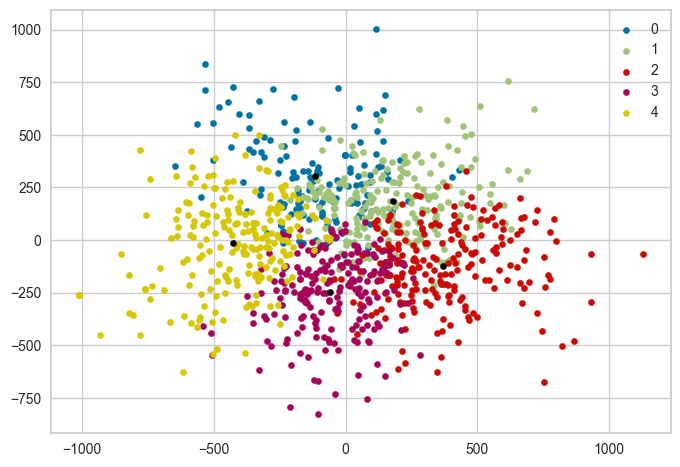

In [473]:
#Getting the Centroids

centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(feat_pca[label == i , 0] , feat_pca[label == i , 1] , s=20, label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'black')
plt.legend()
plt.show()

In [474]:
from yellowbrick.cluster import InterclusterDistance

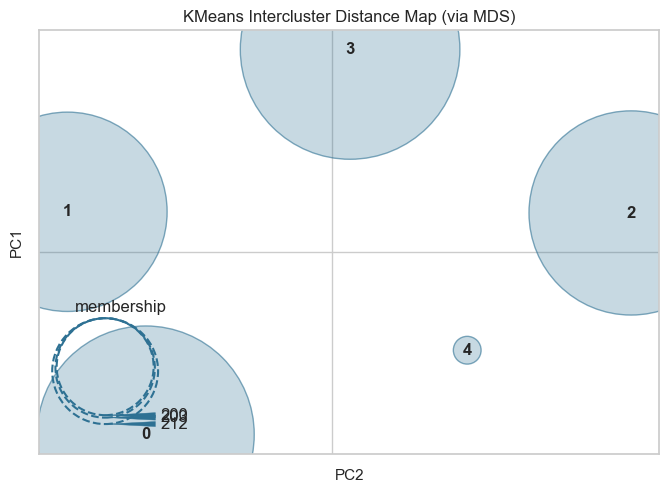

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [475]:
visualizer = InterclusterDistance(KMeans(5))
visualizer.fit(desc)
visualizer.show()

In [476]:
from sklearn.metrics import silhouette_score

silhouette_score(desc, label)

0.005905419559919098

In [477]:
sample_df.kmeans_label.value_counts()

2    225
4    217
1    210
3    207
0    141
Name: kmeans_label, dtype: int64

In [478]:
sample_df.groupby(by=sample_df.label).kmeans_label.value_counts()

label    kmeans_label
drink    4               51
         2               46
         3               42
         1               33
         0               28
food     3               48
         4               44
         2               40
         1               38
         0               30
inside   1               50
         3               48
         2               46
         4               31
         0               25
menu     4               64
         1               41
         2               34
         0               31
         3               30
outside  2               59
         1               48
         3               39
         0               27
         4               27
Name: kmeans_label, dtype: int64

drink = 4  
food = 3  
inside = 1  
menu = 0  
outside = 2  

In [480]:
label_names = {'menu':0, 'inside':1, 'outside':2, 'food':3, 'drink':4}

In [485]:
sample_df["true_label"] = sample_df["label"].map(label_names)
sample_df

,photo_id,label,np_image,keypoints,descriptors,kmeans_label,true_label
0,cO58-hmFkBxDUQ4B0p40AA,inside,"[[115, 115, 114, 112, 109, 108, 106, 104, 103,...","(< cv2.KeyPoint 000001DC66E2B060>, < cv2.KeyPo...","[1, 249, 27, 115, 32, 143, 97, 148, 126, 137, ...",2,1
1,7_hiXIbS5Ub0_eiRxr5COg,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(< cv2.KeyPoint 000001DC66E2B420>, < cv2.KeyPo...","[5, 176, 157, 209, 236, 253, 176, 154, 94, 249...",0,1
2,XseBUNM81RxxtfDgyjxXiA,inside,"[[210, 253, 247, 104, 92, 210, 232, 248, 162, ...","(< cv2.KeyPoint 000001DC66E38240>, < cv2.KeyPo...","[89, 25, 18, 118, 83, 252, 118, 81, 169, 64, 1...",3,1
3,_IRUZoGYSr9bICvBJrPnhw,inside,"[[149, 153, 159, 163, 161, 153, 142, 128, 106,...","(< cv2.KeyPoint 000001DC66E38BA0>, < cv2.KeyPo...","[205, 254, 141, 63, 248, 236, 39, 255, 190, 21...",1,1
4,x8xVVzTI3yW5xZraRZNxfQ,inside,"[[162, 162, 156, 145, 138, 130, 113, 89, 86, 7...","(< cv2.KeyPoint 000001DC66E39500>, < cv2.KeyPo...","[170, 89, 228, 87, 205, 81, 148, 103, 207, 246...",2,1
...,...,...,...,...,...,...,...
995,FYcHZXujQX0GGs1oevYfdQ,menu,"[[200, 200, 200, 200, 200, 200, 200, 200, 200,...","(< cv2.KeyPoint 000001DC670EA850>, < cv2.KeyPo...","[44, 177, 122, 90, 253, 205, 117, 253, 239, 93...",4,0
996,PP2dCAxKLHMzqNAQfoeerw,menu,"[[217, 255, 255, 219, 219, 255, 212, 255, 255,...","(< cv2.KeyPoint 000001DC670EB1B0>, < cv2.KeyPo...","[33, 156, 43, 191, 84, 167, 235, 98, 86, 73, 8...",4,0
997,WiRnjbxlRNGBrCzYDhybWA,menu,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...","(< cv2.KeyPoint 000001DC670EBB10>, < cv2.KeyPo...","[108, 169, 145, 247, 13, 72, 66, 152, 18, 184,...",2,0
998,Wc-r1NIkj8VvpajjOFa1YA,menu,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","(< cv2.KeyPoint 000001DC670EC4B0>, < cv2.KeyPo...","[26, 146, 247, 105, 51, 62, 176, 87, 45, 21, 1...",1,0


In [487]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(sample_df.true_label, sample_df.kmeans_label)

0.006571412812836872